In [37]:
import pandas as pd
import numpy as np
import json, os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

df = pd.read_csv('../dataset/fpolymers_221123.csv', index_col=0)
df = df[~df.TG.isna()]
root = '/home/jhyang/WORKSPACES/vecs/feat'
ids  = json.load(open(os.path.join(root, 'ids.txt')))
vecs_01 = np.loadtxt(os.path.join(root, 'atm_avg_u.txt'))
#vecs_01 = np.loadtxt(os.path.join(root, 'mol_max.txt'))
vecs_02 = np.loadtxt(os.path.join(root, 'mol_avg_u.txt'))
info_01 = pd.read_csv(os.path.join('../dataset/screen_01.csv'))
info_02 = pd.read_csv(os.path.join('../dataset/screen_02.csv'))
n = df.shape[0]

col_s = [f'SMILES_{x}' for x in 'ABCDE']
col_w = [f'FR_{x}' for x in 'ABCDE']
frate = []
ws = []
for id, row in df.iterrows():
    s = row[col_s].values
    w = row[col_w].fillna(0).values
    m = ['F' in _s for _s in s]
    ws.append(w)
    frate.append(np.sum(w[m])/np.sum(w))

cs = [
    df.TG.values + 273.15, 
    np.array(frate),
    np.sum(np.array(ws) != 0, axis=1),
]

#ids[n], n, vecs_01.shape, vecs_02.shape
output = {}

In [38]:
df = pd.read_csv('../dataset/fpolymers_221123.csv', index_col=0)
np.sum(~df.TG.isna()), np.sum(~df.DC.isna())
df = df[~df.TG.isna()]

In [40]:
ids_c1 = ['FA-00298', 'FA-00301', 'FA-00353', 'FA-00411', 'FA-00412',
          'FA-00413', 'FA-00414', 'FA-00416', 'FA-00417', 'FA-00418',
          'FA-00419', 'FA-00420', 'FA-00421', 'FA-00422', 'FA-00424',
          'FA-00425', 'FA-00426', 'FA-00428', 'FA-00429', 'FA-00430',
          'FA-00431', 'FA-00432', 'FA-00433', 'FA-00434', 'FA-00435',
          'FA-00436', 'FA-00438', 'FA-00439', 'FA-00441', 'FA-00442',
          'FA-00443', 'FA-00444', 'FA-00445', 'FA-00447', 'FA-00448',
          'FA-00484']

mc1 = df.index.isin(ids_c1)
nc1 = np.sum(mc1)
nc2 = np.sum(~mc1)
vecs_02_c1 = vecs_02[:n][mc1]
vecs_02_c2 = vecs_02[:n][~mc1]
vecs_02_gen = vecs_02[n:]

vecs_01_c1 = vecs_01[:n][mc1]
vecs_01_c2 = vecs_01[:n][~mc1]
vecs_01_gen = vecs_01[n:]

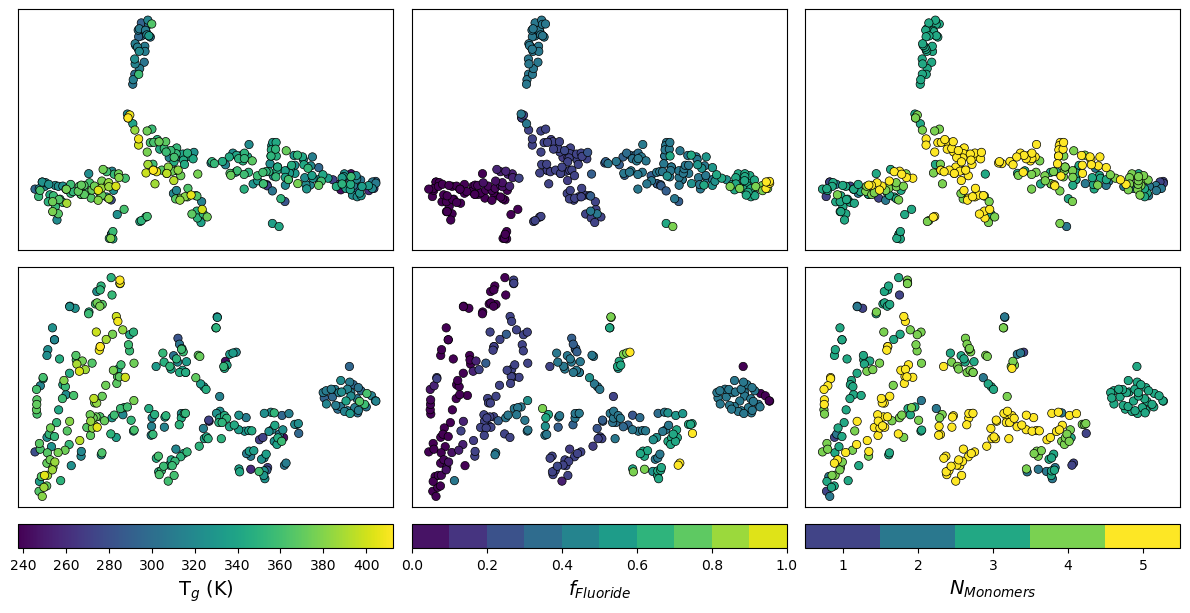

In [69]:
vs = [[237.5,412.5],[0,1],[0,5]]
f, axs = plt.subplots(3,3,figsize=(15,7), gridspec_kw={'height_ratios':[1,1,0.1]})
ims = []
for _ax, vec in zip(axs[:2], [vecs_01, vecs_02]):
    tsne = TSNE(init='pca', learning_rate='auto')
    tvec = tsne.fit_transform(vec[:n])
    for ax, cax, v, c in zip(_ax, axs[-1], vs, cs):
        o = np.argsort(c)
#    ax.set_xlim([-30,40])
#    ax.set_ylim([-10,10])
        im = ax.scatter(*tvec[o].T, c=c[o], vmin=v[0], vmax=v[1], alpha=1, 
                        edgecolor=[0,0,0], linewidths=0.5)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ims.append(im)
plt.colorbar(ims[0], cax=axs[-1,0], orientation='horizontal')
axs[-1,0].set_xlabel('T$_g$ (K)', fontsize=14)
plt.colorbar(ims[1], cax=axs[-1,1], orientation='horizontal', boundaries=np.linspace(0.,1,11), ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
axs[-1,1].set_xlabel('$f_{Fluoride}$', fontsize=14)
plt.colorbar(ims[2], cax=axs[-1,2], orientation='horizontal', boundaries=np.linspace(0.5,5.5,6), ticks=[1, 2, 3, 4, 5])
axs[-1,2].set_xlabel('$N_{Monomers}$', fontsize=14)
f.subplots_adjust(wspace=0.05, hspace=0.1)

In [102]:
import tqdm
output = {}
for i in tqdm.tqdm(range(vecs_gen.shape[0] // 200 + 1)):
    i1 = (i) * 200
    i2 = (i + 1) * 200
    tsne = TSNE()
    tvecs = tsne.fit_transform(np.vstack([vecs_c1, vecs_c2, vecs_gen[i1:i2]]))
    tvec_c1 = tvecs[:nc1]
    tvec_c2 = tvecs[nc1:n]
    tvec_gen = tvecs[n:]
    output[i] = tvec_c1, tvec_c2, tvec_gen


100%|██████████| 1144/1144 [08:26<00:00,  2.26it/s]


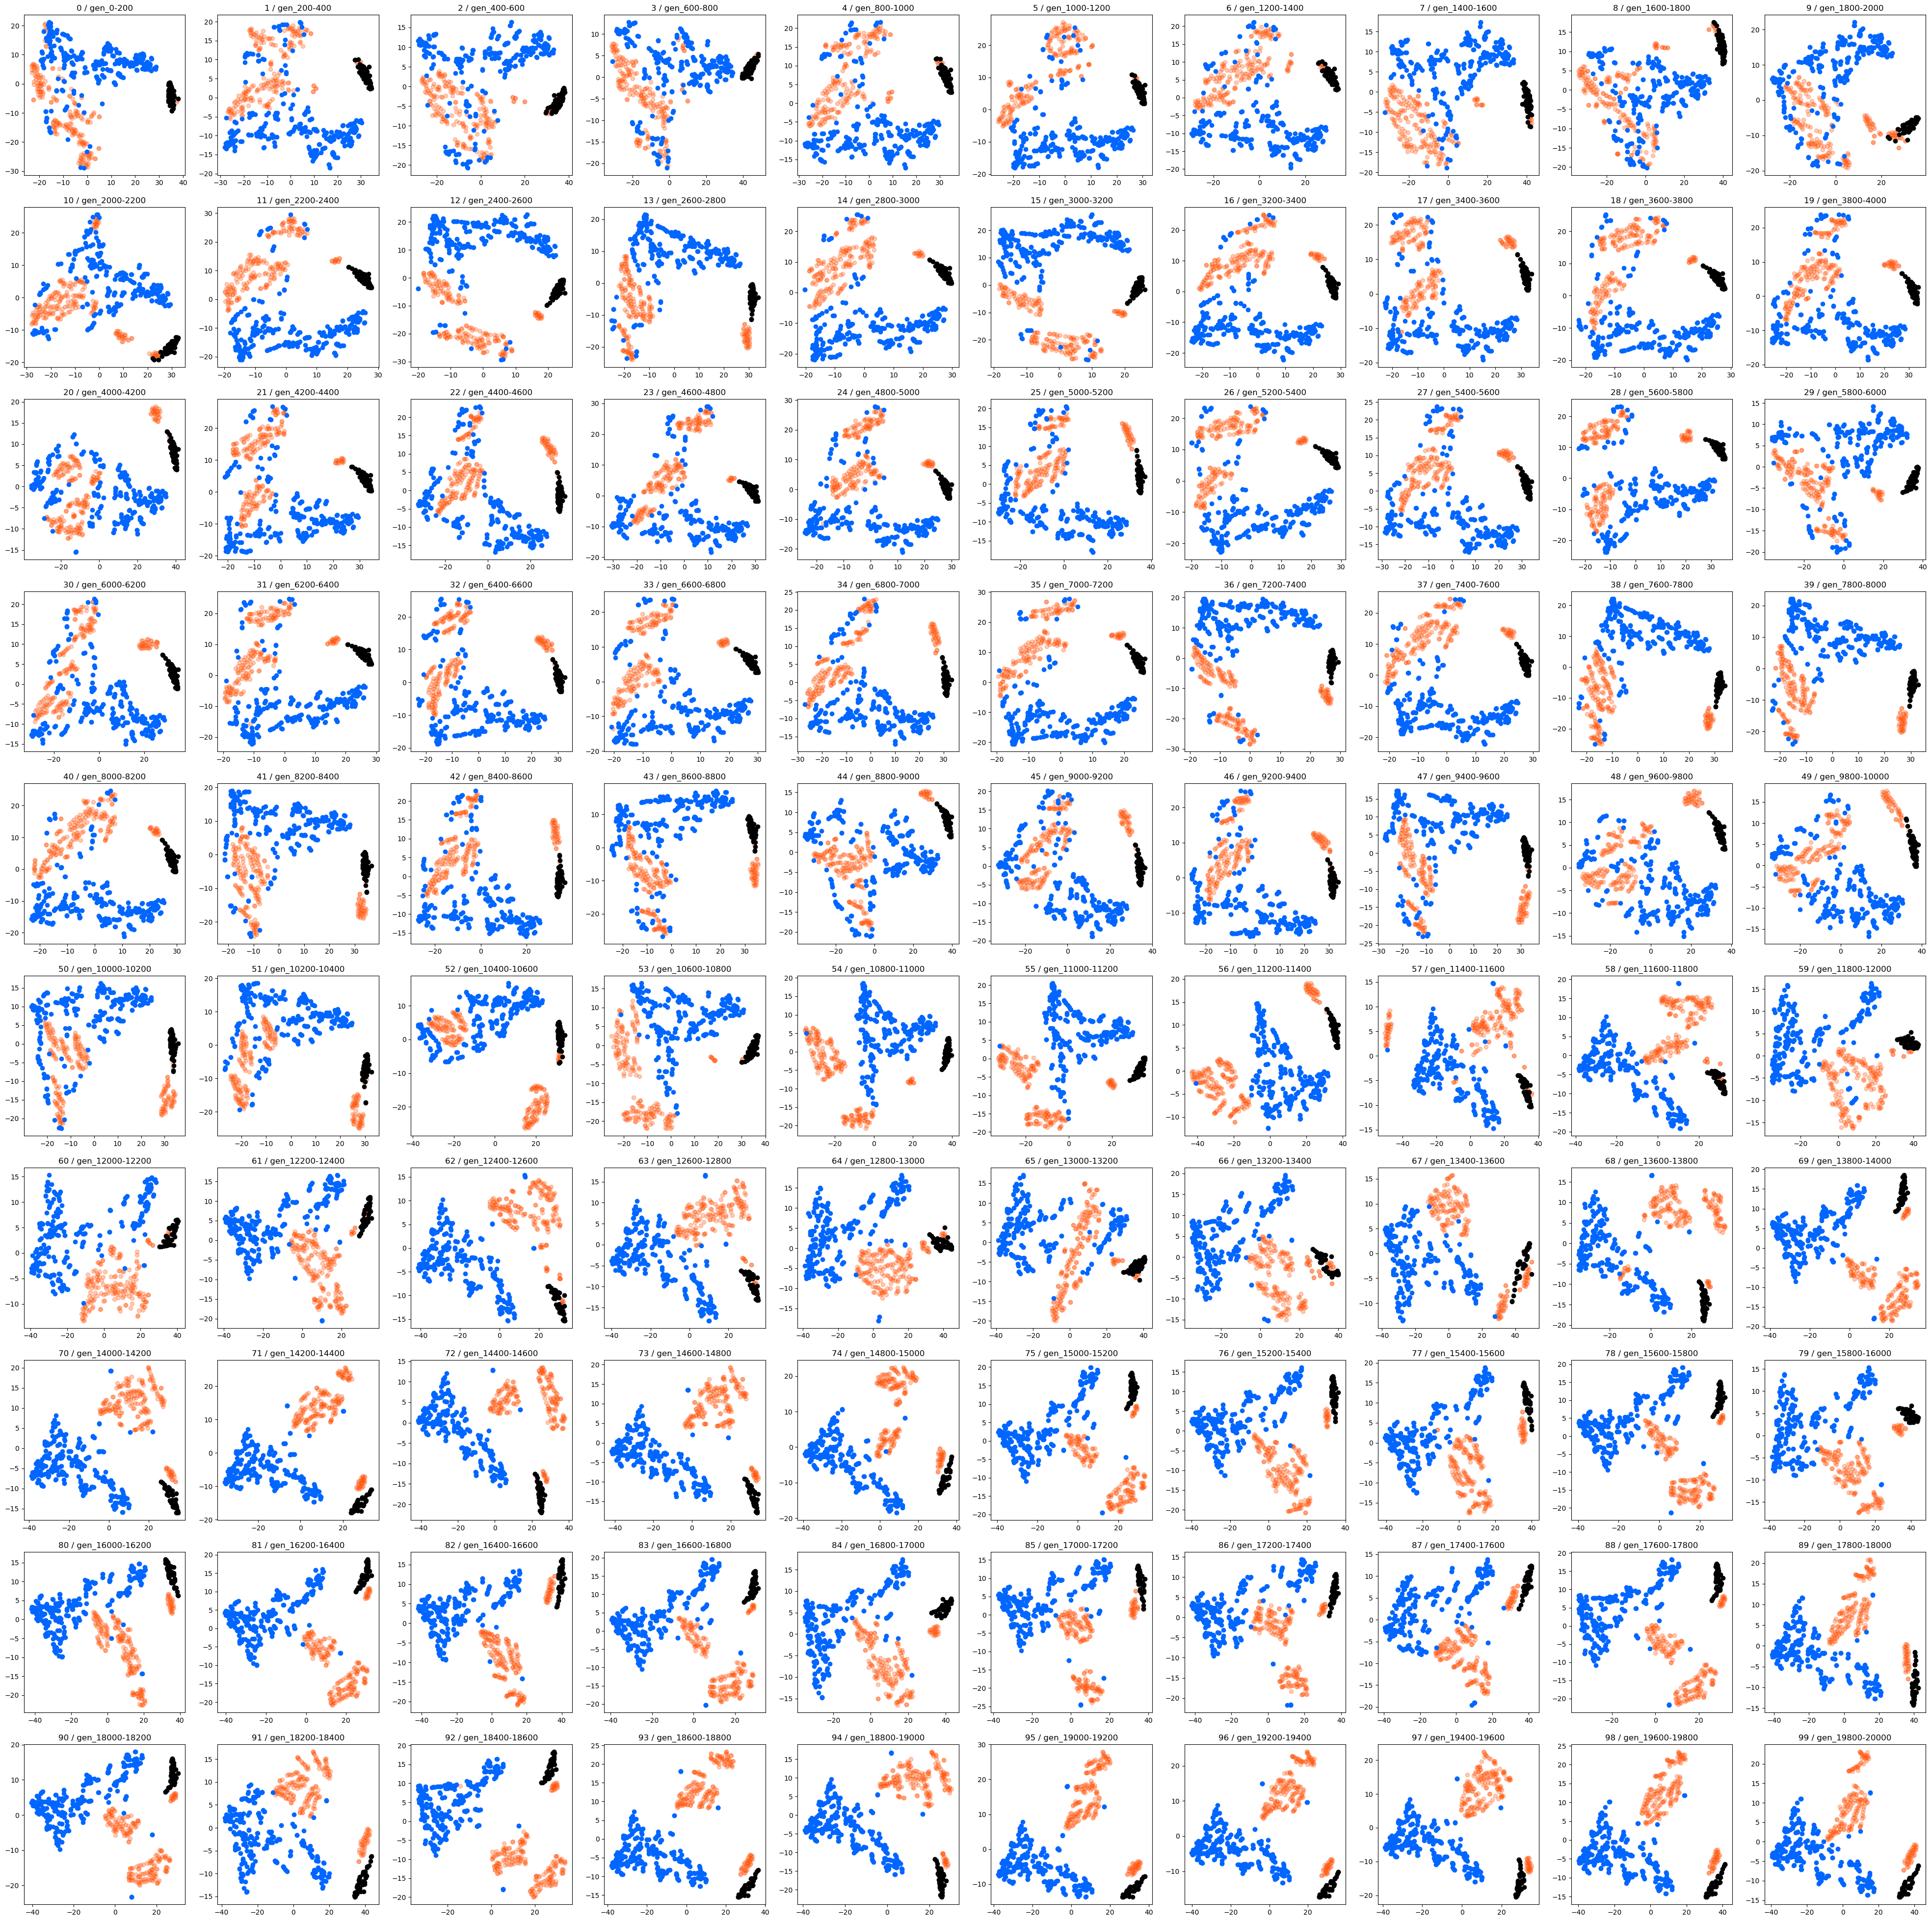

In [107]:
nrow, ncol = 10, 10
m = 200
l = 0
f, axs = plt.subplots(nrow,ncol,figsize=(ncol*5, nrow*5))
for i, ax in enumerate(axs.reshape(-1)):
    i1 = (i + l) * m
    i2 = (i + l + 1) * m
    tvec_c1, tvec_c2, tvec_gen = output[i+l]
    ax.set_title(f'{i+l} / gen_{i1}-{i2}')
    ax.scatter(*tvec_gen.T, color=[1,0.3,0], alpha=0.3)
    ax.scatter(*tvec_c1.T, color=[0,0,0])
    ax.scatter(*tvec_c2.T, color=[0,0.4,1])

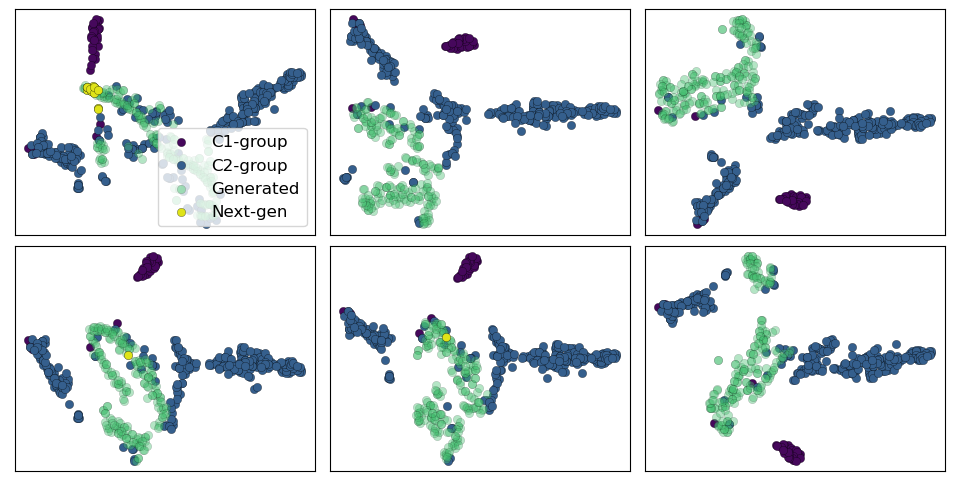

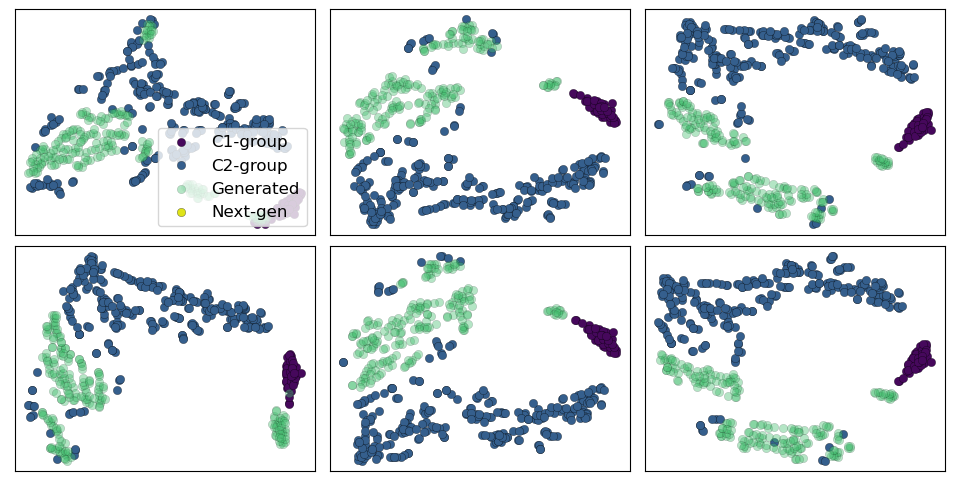

In [114]:
nrow, ncol = 3, 3
m = 200
l = 10
cmap = plt.get_cmap('viridis')
for vecs_c1, vecs_c2, vecs_gen in zip([vecs_01_c1,vecs_02_c1], 
                                      [vecs_01_c2,vecs_02_c2], 
                                      [vecs_01_gen,vecs_02_gen]):
    f, axs = plt.subplots(nrow,ncol,figsize=(ncol*3, nrow*3))
    for i, ax in enumerate(axs.reshape(-1)):
        i1 = (i + l) * m
        i2 = i1 + m
        tsne = TSNE()
        tvecs = tsne.fit_transform(np.vstack([vecs_c1, vecs_c2, vecs_gen[i1:i2]]))
        tvec_c1 = tvecs[:nc1]
        tvec_c2 = tvecs[nc1:n]
        tvec_gen = tvecs[n:]
    #    ax.set_title(f'{i+l} / gen_{i1}-{i2}')
        idx = masking({0:(tvec_c1, tvec_c2, tvec_gen)})
        ax.scatter(*tvec_c1.T, color=cmap(0.02), linewidths=0.2, edgecolor=[0,0,0], label='C1-group')
        ax.scatter(*tvec_c2.T, color=cmap(0.3), linewidths=0.2, edgecolor=[0,0,0], label='C2-group')
        ax.scatter(*tvec_gen.T, color=cmap(0.7), linewidths=0.2, edgecolor=[0,0,0], label='Generated', alpha=0.4)
        ax.scatter(*tvec_gen[idx].T, color=cmap(0.95), linewidths=0.2, edgecolor=[0,0,0], label='Next-gen')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
    f.subplots_adjust(wspace=0.05, hspace=0.05)
    axs[0,0].legend(loc='lower right', fontsize=12)

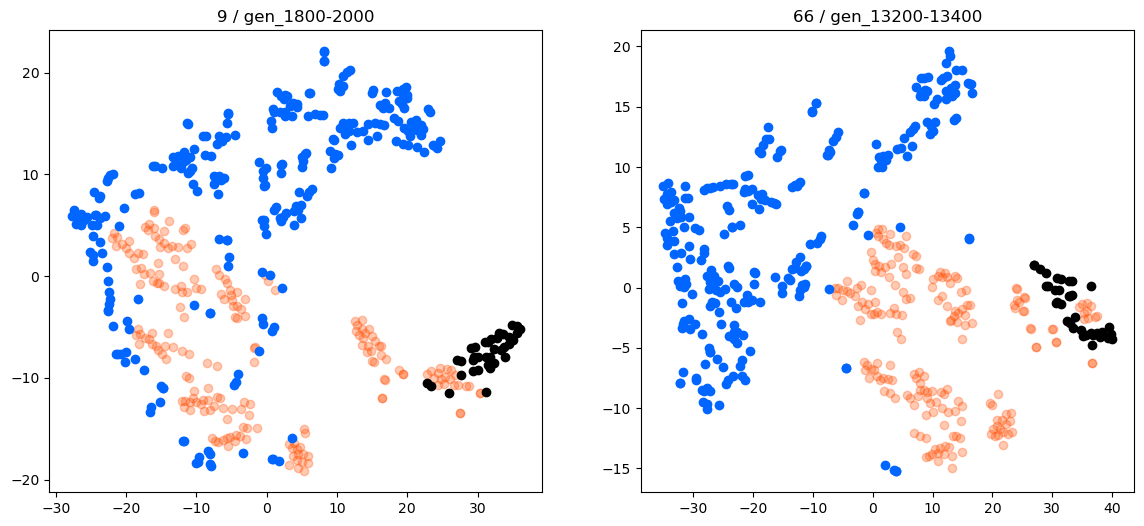

In [114]:
ids = [9,66]
f, axs = plt.subplots(1,2,figsize=(14,6))
for id, ax in zip(ids, axs):
    tvec_c1, tvec_c2, tvec_gen = output[id]
    ax.set_title(f'{id} / gen_{id*200}-{(id+1)*200}')
    ax.scatter(*tvec_gen.T, color=[1,0.3,0], alpha=0.3)
    ax.scatter(*tvec_c1.T, color=[0,0,0])
    ax.scatter(*tvec_c2.T, color=[0,0.4,1])

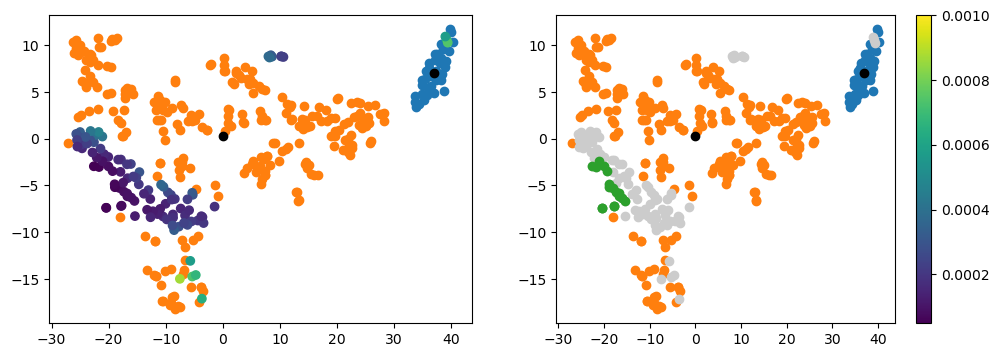

In [75]:
from scipy.stats import gaussian_kde
f, axs = plt.subplots(1,2,figsize=(12,4))
gx, gy = np.mgrid[-100:100:100j, -100:100:100j]
grid = np.vstack([gx.ravel(), gy.ravel()])

v1, v2, vg = output[15]
k = gaussian_kde(np.vstack([v1, v2]).T, bw_method=0.25)
c = k(vg.T)
c1 = np.mean(v1, axis=0)
c2 = np.mean(v2, axis=0)
axs[0].scatter(*v1.T)
axs[0].scatter(*v2.T)
im = axs[0].scatter(*vg.T, c=c, alpha=1, vmax=0.001)
plt.colorbar(im, ax=axs[1], orientation='vertical')
mask_density = c < 1e-4
axs[1].scatter(*v1.T)
axs[1].scatter(*v2.T)
axs[1].scatter(*vg.T, alpha=1, color=[0.8, 0.8, 0.8])
axs[1].scatter(*vg[mask_density].T)
for ax in axs:
    ax.scatter(*c1, color=[0,0,0])
    ax.scatter(*c2, color=[0,0,0])

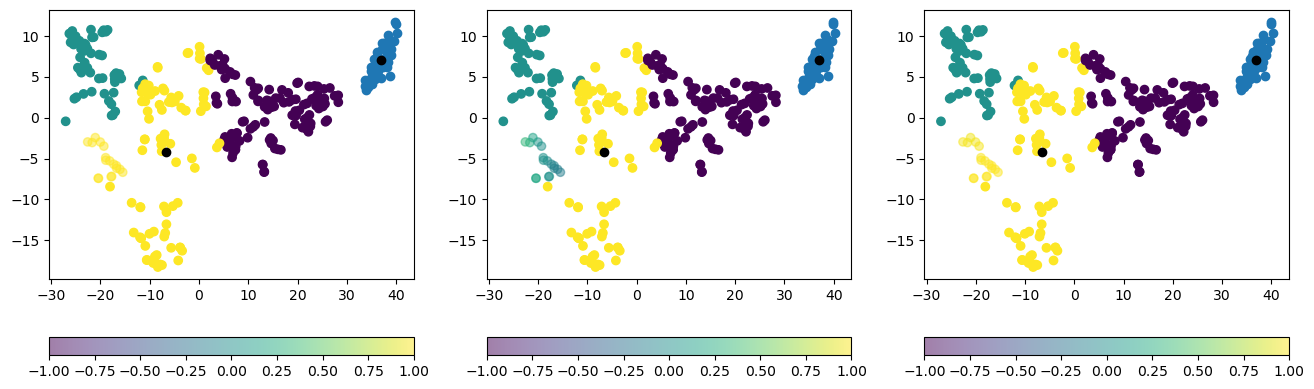

In [76]:

mask_vector = np.zeros_like(mask_density)
dots = []
n_near = 5
km = KMeans(n_clusters=3, n_init='auto')
lbl = km.fit_predict(v2)
for i in np.where(mask_density)[0]:
    c2s = km.cluster_centers_

    g = vg[i]
    cv1  = c1 - g
    cd1  = np.sqrt(np.sum(np.square(cv1)))

    dot = []
    for c2 in c2s:
        cv2 = c2 - g
        cd2 = np.sqrt(np.sum(np.square(cv2)))
        dot.append(np.dot(cv1/cd1, cv2/cd2))
    dots.append(dot)

f, axs= plt.subplots(1,3,figsize=(16,5))
for ax, c in zip(axs, np.array(dots).T):
    ax.scatter(*v1.T)
    ax.scatter(*v2.T, c=lbl)
    ax.scatter(*c1.T, color=[0,0,0])
    ax.scatter(*c2.T, color=[0,0,0])
    im = ax.scatter(*vg[mask_density].T, c=c, vmin=-1, vmax=1, alpha=0.5)
    plt.colorbar(im, ax=ax, orientation='horizontal')


In [77]:
m_fin = np.sum(np.array([dots_c1c2, dots_c1v2]) < 0, axis=0) == 2
plt.scatter(*v1.T)
plt.scatter(*v2.T)
plt.scatter(*vg[mask_density].T, color=[0.8, 0.8, 0.8])
plt.scatter(*vg[mask_density][m_fin].T)
#plt.plot([-20,20],[0,0],ls='--',lw=0.5,color=[0,0,0])
#plt.plot([0,0],[-10,10],ls='--',lw=0.5,color=[0,0,0])
#plt.scatter(*ncv1, color=[1,0,0])
#plt.scatter(*ncv2, color=[0,0,1])
#plt.scatter(*(ncv1+g), color=[1,0,0])
#plt.scatter(*(ncv2+g), color=[0,0,1])

NameError: name 'dots_c1c2' is not defined

## Screening over generation

In [115]:
output_atm_gen = {}
output_mol_gen = {}

In [139]:
from sklearn.cluster import KMeans
import tqdm
from scipy.stats import gaussian_kde

def masking(output, labels=False):
    next_idxs = []
    cluster_labels = []
    for i, (v1, v2, vg) in output.items():
        k = gaussian_kde(np.vstack([v1, v2]).T, bw_method=0.1)
        km = KMeans(n_clusters=3, n_init='auto')
        lbls = km.fit_predict(v2)
        cluster_labels = np.hstack([cluster_labels, lbls])
        mask = k(vg.T) < 1e-4
        c1 = np.mean(v1, axis=0)
        c2s = km.cluster_centers_
        for j in np.where(mask)[0]:
            g = vg[j]
            cv1 = c1 - g
            cd1  = np.sqrt(np.sum(np.square(cv1)))

            for c2 in c2s:
                cv2 = c2 - g
                cd2 = np.sqrt(np.sum(np.square(cv2)))
                mask[j] = mask[j] & (np.dot(cv1/cd1, cv2/cd2) <= 0)
                if not mask[j]:
                    break

        next_idxs = np.hstack([next_idxs, i * 200 + np.where(mask)[0]]).astype(int)
    if labels:
        return next_idxs, cluster_labels
    else:
        return next_idxs

In [158]:
idxs = np.arange(vecs_01_gen.shape[0])
for gen in range(15):
    if gen == 0 and gen in output_atm_gen.keys():
        idxs, output_ = output_atm_gen[gen]
        print(f'Loading saved Gen {gen}')
    else:
        output_ = {}
        vecs_g = vecs_01_gen[idxs]
        for i in tqdm.tqdm(range(vecs_g.shape[0] // 200 + 1), desc=f'Gen {gen}'):
            i1 = i * 200
            i2 = i1 + 200
            tsne = TSNE()
            tvecs = tsne.fit_transform(np.vstack([vecs_01_c1, vecs_01_c2, vecs_g[i1:i2]]))
            v1, v2, vg = tvecs[:nc1], tvecs[nc1:n], tvecs[n:]
            output_[i] = v1, v2, vg
        output_atm_gen[gen] = idxs, output_
    next_idxs = masking(output_)
    idxs = idxs[next_idxs]

idxs = np.arange(vecs_02_gen.shape[0])
for gen in range(15):
    if gen == 0 and gen in output_mol_gen.keys():
        idxs, output_ = output_mol_gen[gen]
        print(f'Loading saved Gen {gen}')
    else:
        output_ = {}
        vecs_g = vecs_02_gen[idxs]
        for i in tqdm.tqdm(range(vecs_g.shape[0] // 200 + 1), desc=f'Gen {gen}'):
            i1 = i * 200
            i2 = i1 + 200
            tsne = TSNE()
            tvecs = tsne.fit_transform(np.vstack([vecs_02_c1, vecs_02_c2, vecs_g[i1:i2]]))
            v1, v2, vg = tvecs[:nc1], tvecs[nc1:n], tvecs[n:]
            output_[i] = v1, v2, vg
        output_mol_gen[gen] = idxs, output_
    next_idxs = masking(output_)
    idxs = idxs[next_idxs]

Loading saved Gen 0


Gen 14: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


Loading saved Gen 0


Gen 14: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]


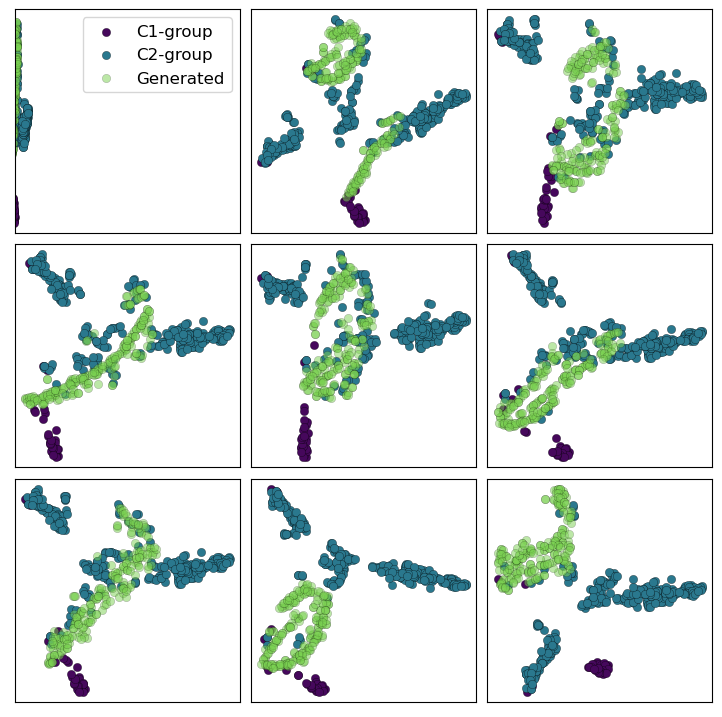

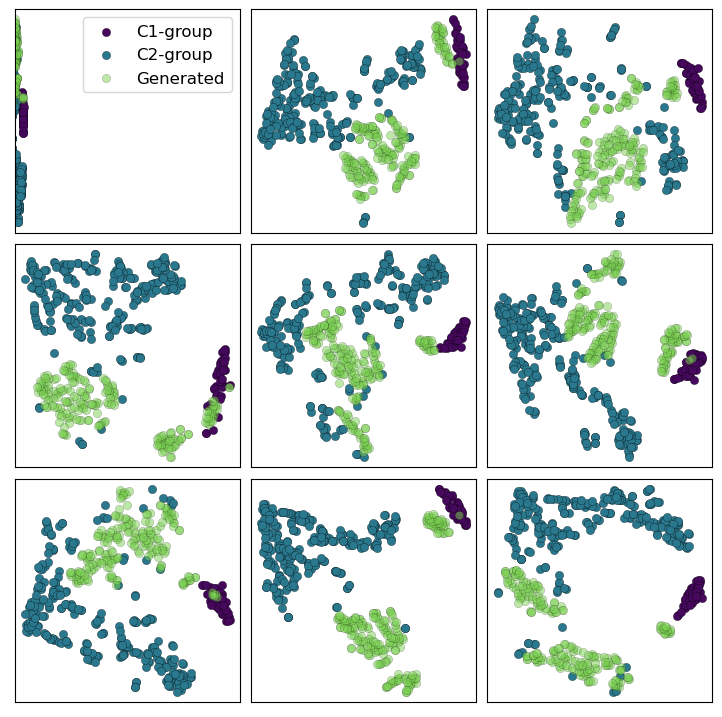

In [212]:
nrow, ncol = 3, 3
#np.random.seed(102)
imask = np.zeros(len(output_atm_gen[0][1]), dtype=bool)
imask[:nrow*ncol] = True
np.random.shuffle(imask)
idxs = [5, 674, 315, 1039, 601, 736, 921, 668, 12]
#idxs = np.where(imask)[0]
#print(idxs)
cmap = plt.get_cmap('viridis')
for output in [output_atm_gen[0][1], output_mol_gen[0][1]]:
    f, axs = plt.subplots(nrow,ncol,figsize=(ncol*3, nrow*3))
    for i, ax in zip(idxs, axs.reshape(-1)):
        tvec_c1, tvec_c2, tvec_gen = output[i]
        nidx, lbls = masking({0:output[i]}, labels=True)
        ax.scatter(*tvec_c1.T, color=cmap(0.02), linewidths=0.2, edgecolor=[0,0,0], label='C1-group')
        ax.scatter(*tvec_c2.T, color=cmap(0.4), linewidths=0.2, edgecolor=[0,0,0], label='C2-group')
#        ax.scatter(*tvec_c2.T, c=lbls, linewidths=0.2, edgecolor=[0,0,0], vmin=-1, vmax=3, label='C2-group')
        ax.scatter(*tvec_gen.T, color=cmap(0.8), linewidths=0.2, edgecolor=[0,0,0], label='Generated', alpha=0.5)
     #   ax.scatter(*tvec_gen[nidx].T, color=cmap(0.99), linewidths=0.2, edgecolor=[0,0,0], label='Next-gen')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
#        ax.text(0,0,str(i))
    f.subplots_adjust(wspace=0.05, hspace=0.05)
    axs[0,0].legend(loc='upper right', fontsize=12)
    axs[0,0].set_xlim([0,800])

In [171]:
import pickle
tsne = TSNE(init='pca', learning_rate='auto')
tvatom = tsne.fit_transform(np.vstack([vecs_01_c1, vecs_01_c2, vecs_01_gen]))

tsne = TSNE(init='pca', learning_rate='auto')
tvmol = tsne.fit_transform(np.vstack([vecs_02_c1, vecs_02_c2, vecs_02_gen]))

TypeError: dump() missing required argument 'file' (pos 2)

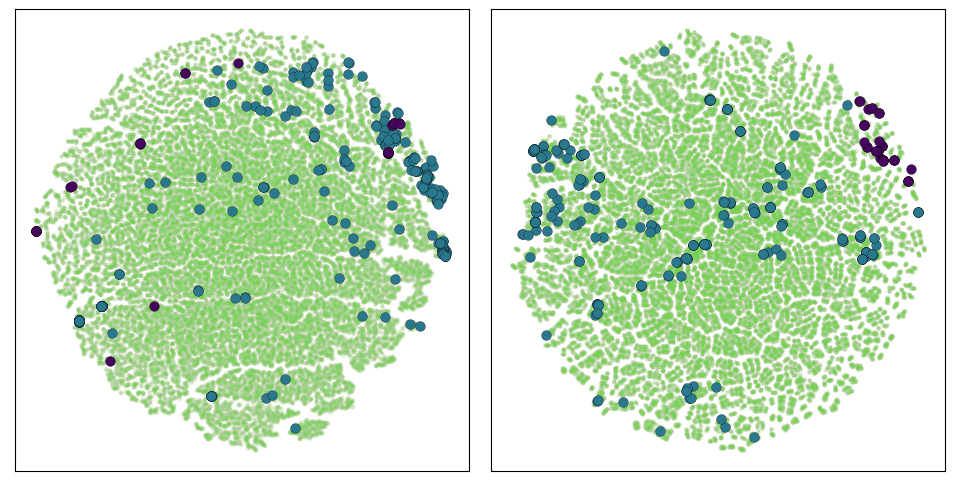

In [205]:
nrow, ncol = 1, 2
cmap = plt.get_cmap('viridis')
f, axs = plt.subplots(nrow,ncol,figsize=(ncol*6, nrow*6))
for ax, tvec in zip(axs, [tvatom, tvmol]):
    tvec_c1, tvec_c2, tvec_gen = tvec[:nc1], tvec[nc1:n], tvec[n:]
    ax.scatter(*tvec_gen.T, color=cmap(0.8), label='Generated', alpha=0.02, s=4)
    ax.scatter(*tvec_c2.T, color=cmap(0.4), linewidths=0.2, edgecolor=[0,0,0], label='C2-group', s=50)
    ax.scatter(*tvec_c1.T, color=cmap(0.02), linewidths=0.2, edgecolor=[0,0,0], label='C1-group', s=50)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
f.subplots_adjust(wspace=0.05, hspace=0.05)

(200, 2)
(103, 2)
(200, 2)
(165, 2)


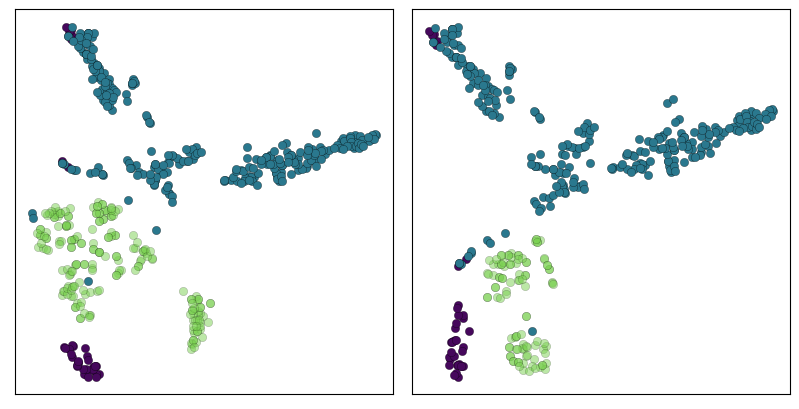

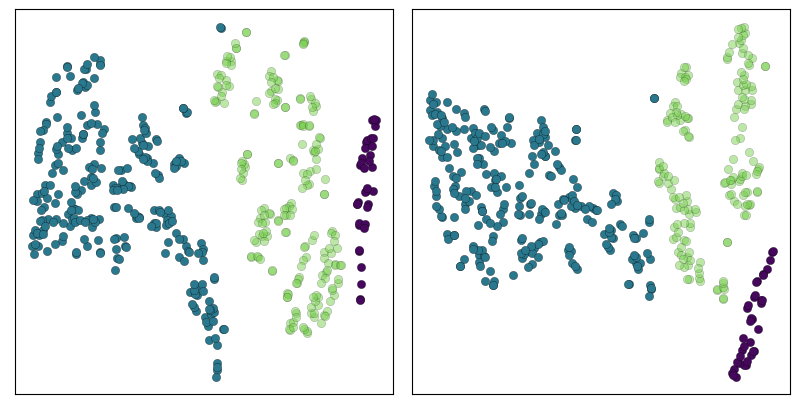

In [214]:
nrow, ncol = 1, 2
cmap = plt.get_cmap('viridis')
for output in [output_atm_gen[5][1], output_mol_gen[10][1]]:
    f, axs = plt.subplots(nrow,ncol,figsize=(ncol*5, nrow*5))
    for i, ax in zip(output.keys(), axs.reshape(-1)):
        tvec_c1, tvec_c2, tvec_gen = output[i]
#        nidx, lbls = masking({0:output[i]}, labels=True)
        ax.scatter(*tvec_c1.T, color=cmap(0.02), linewidths=0.2, edgecolor=[0,0,0], label='C1-group')
        ax.scatter(*tvec_c2.T, color=cmap(0.4), linewidths=0.2, edgecolor=[0,0,0], label='C2-group')
#        ax.scatter(*tvec_c2.T, c=lbls, linewidths=0.2, edgecolor=[0,0,0], vmin=-1, vmax=3, label='C2-group')
        ax.scatter(*tvec_gen.T, color=cmap(0.8), linewidths=0.2, edgecolor=[0,0,0], label='Generated', alpha=0.5)
#        ax.scatter(*tvec_gen[nidx].T, color=cmap(0.95), linewidths=0.2, edgecolor=[0,0,0], label='Next-gen')
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
#        ax.text(0,0,str(i))
        print(tvec_gen.shape)
    f.subplots_adjust(wspace=0.05, hspace=0.05)
#    axs[0].legend(loc='upper right', fontsize=12)


In [166]:
len(output_atm_gen[5][0]), len(output_mol_gen[10][0])

(303, 365)

In [170]:
info_02.loc[output_mol_gen[10][0]].index.isin(output_atm_gen[5][0])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

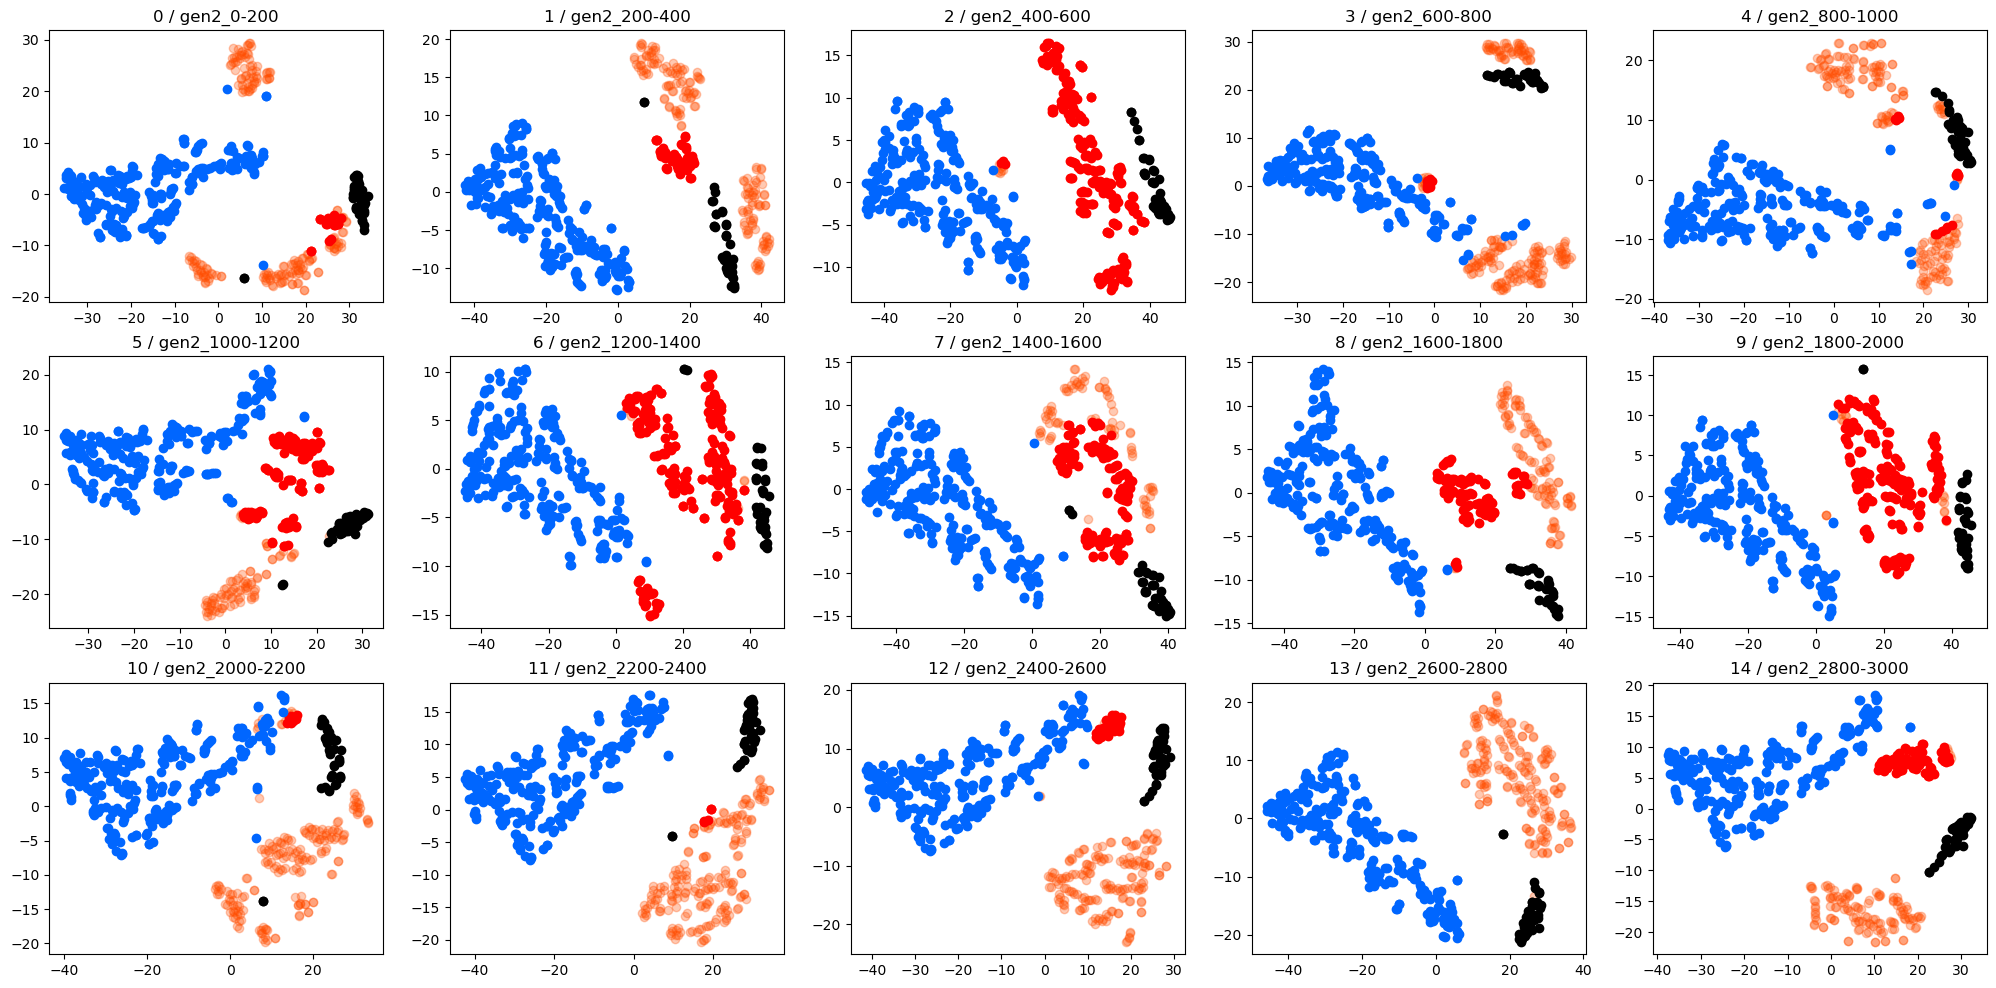

In [522]:
nrow, ncol = 3, 5
m = 200
l = 0
f, axs = plt.subplots(nrow,ncol,figsize=(ncol*5, nrow*4))
for i, ax in enumerate(axs.reshape(-1)):
    i1 = (i + l) * m
    i2 = (i + l + 1) * m
    tvec_c1, tvec_c2, tvec_gen = output[i+l]
    idxs = masking({0:output[i+l]})
    ax.set_title(f'{i+l} / gen2_{i1}-{i2}')
    ax.scatter(*tvec_gen.T, color=[1,0.3,0], alpha=0.3)
    ax.scatter(*tvec_gen[idxs].T, color=[1,0,0], alpha=1)
    ax.scatter(*tvec_c1.T, color=[0,0,0])
    ax.scatter(*tvec_c2.T, color=[0,0.4,1])

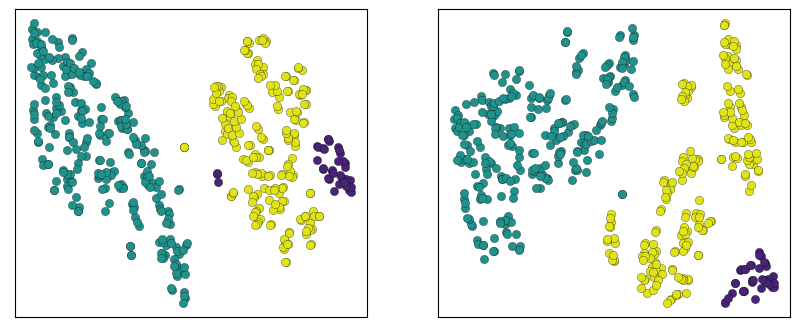

: 

In [572]:
gen = 8
gidxs, output = output_gen[gen]
len(output)

nrow, ncol = 1, 2
m = 200
l = 0
f, axs = plt.subplots(nrow,ncol,figsize=(ncol*5, nrow*4))
for i, ax in enumerate(axs.reshape(-1)):
    i1 = (i + l) * m
    i2 = (i + l + 1) * m
    tvec_c1, tvec_c2, tvec_gen = output[i+l]
    idxs = masking({0:output[i+l]})
#    ax.set_title(f'{i+l} / gen2_{i1}-{i2}')
    ax.scatter(*tvec_gen.T, color=cmap(0.95), linewidths=0.2, edgecolor=[0,0,0], label='Generated')
    ax.scatter(*tvec_c1.T, color=cmap(0.02), linewidths=0.2, edgecolor=[0,0,0], label='C1-group')
    ax.scatter(*tvec_c2.T, color=cmap(0.5), linewidths=0.2, edgecolor=[0,0,0], label='C2-group')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])


In [509]:
a, b= pairwise_distances_argmin_min(km.cluster_centers_, vg)


In [513]:
a, b

(array([ 44, 173, 190,  21, 116,  92, 187,  16, 105, 113]),
 array([0.48179917, 1.11097956, 0.14026409, 0.65249241, 0.76639534,
        0.2432402 , 0.13907866, 0.62346358, 0.10759217, 1.0722301 ]))

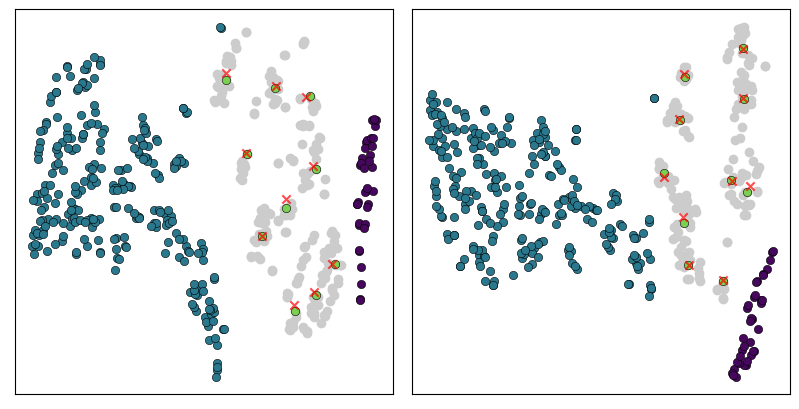

In [232]:
gidxs, output = output_mol_gen[10]
from sklearn.metrics import pairwise_distances_argmin_min
f, axs = plt.subplots(1,2,figsize=(10, 5))
final_indexs = []
for i, (ax, (v1, v2, vg)) in enumerate(zip(axs, output.values())):
    km = KMeans(n_clusters=10, n_init='auto', random_state=50)
    km.fit(vg)
    closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, vg)
    ax.scatter(*v1.T, color=cmap(0.02), linewidth=0.4, edgecolor=[0,0,0])
    ax.scatter(*v2.T, color=cmap(0.4), linewidth=0.4, edgecolor=[0,0,0])
    ax.scatter(*vg.T, color=[0.8, 0.8, 0.8])
    ax.scatter(*vg[closest].T, color=cmap(0.8), linewidth=0.4, edgecolor=[0,0,0])
    ax.scatter(*km.cluster_centers_.T, color=[1,0,0], alpha=0.7, marker='x')
    final_indexs.append(gidxs[i*200 + closest])
    ax.set_xticks([], labels=[])
    ax.set_yticks([], labels=[])
f.subplots_adjust(wspace=0.05)

In [507]:
info_02.loc[np.sort(np.hstack(final_indexs))].to_csv('selected.csv', index=False)

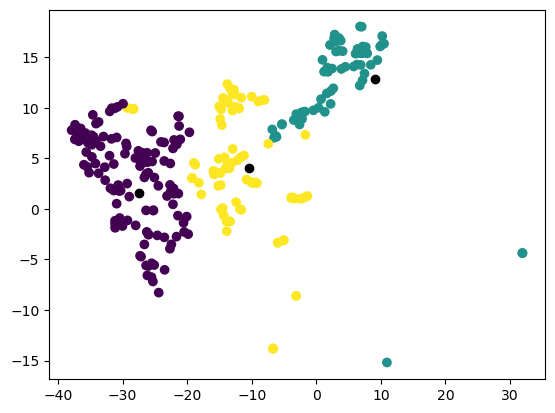

In [424]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init='auto')
lbl = km.fit_predict(output[6][1])
plt.scatter(*output[5][1].T, c=lbl)
plt.scatter(*km.cluster_centers_.T, color=[0,0,0])

In [404]:
idxs

{0: (array([[ 3.0934540e+01, -2.3700168e+00],
         [ 3.0856033e+01, -2.4050519e+00],
         [ 3.2683670e+01, -1.6347369e+00],
         [ 3.2334175e+01, -7.4759227e-01],
         [ 3.3532223e+01, -2.1094303e-01],
         [ 3.5524757e+01,  3.5317142e+00],
         [ 3.4027100e+01,  1.8925226e+00],
         [ 3.3173241e+01,  5.2208275e-01],
         [ 3.3815830e+01,  8.5166377e-01],
         [ 3.4737732e+01,  2.5788050e+00],
         [ 3.6023094e+01,  3.6324339e+00],
         [ 3.5476593e+01,  2.9478610e+00],
         [ 3.4492874e+01,  2.1115751e+00],
         [ 3.3168110e+01,  7.3526096e-01],
         [ 3.2662228e+01, -6.9441003e-01],
         [ 3.5347900e+01,  1.8505331e+00],
         [ 3.4054581e+01, -9.5235258e-03],
         [ 3.6968536e+01,  4.9423623e+00],
         [ 3.4493336e+01, -7.6810676e-01],
         [ 3.7145424e+01,  1.7416316e+00],
         [ 3.5874226e+01,  3.8361877e-02],
         [ 3.7912598e+01,  4.4852962e+00],
         [ 3.8079948e+01,  5.0083728e+00],
        